### Libs

In [28]:
# import libs
import pandas as pd
from src_analysis.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy , CategoricalSummaryInspectionStrategy
from src_analysis.missing_values_analysis import SimpleMissingValuesAnalysis
from src_analysis.univariate_analysis import CategoricalUnivariateAnalysisStrategy, NumericalUnivariateAnalysisStrategy

### load data

In [9]:
# load the data
data_path = "../Data/Housing.csv"
df = df = pd.read_csv(data_path)

## Data inspection

In [19]:
# basic inspection
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.inspect_data(df)


### Data Types and Non-Null Counts ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [20]:
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.inspect_data(df)

### Summary Statistics (Numerical Columns) ###
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [17]:
data_inspector.set_strategy(CategoricalSummaryInspectionStrategy())
data_inspector.inspect_data(df)

### Summary Statistics (Categorical Columns) ###
       mainroad guestroom basement hotwaterheating airconditioning prefarea  \
count       545       545      545             545             545      545   
unique        2         2        2               2               2        2   
top         yes        no       no              no              no       no   
freq        468       448      354             520             373      417   

       furnishingstatus  
count               545  
unique                3  
top      semi-furnished  
freq                227  


In [25]:
# missing values
missing_values_analyser = SimpleMissingValuesAnalysis()
missing_values_analyser.identify_missing_values(df)

No missing values found in the DataFrame.


,Column,Missing Values


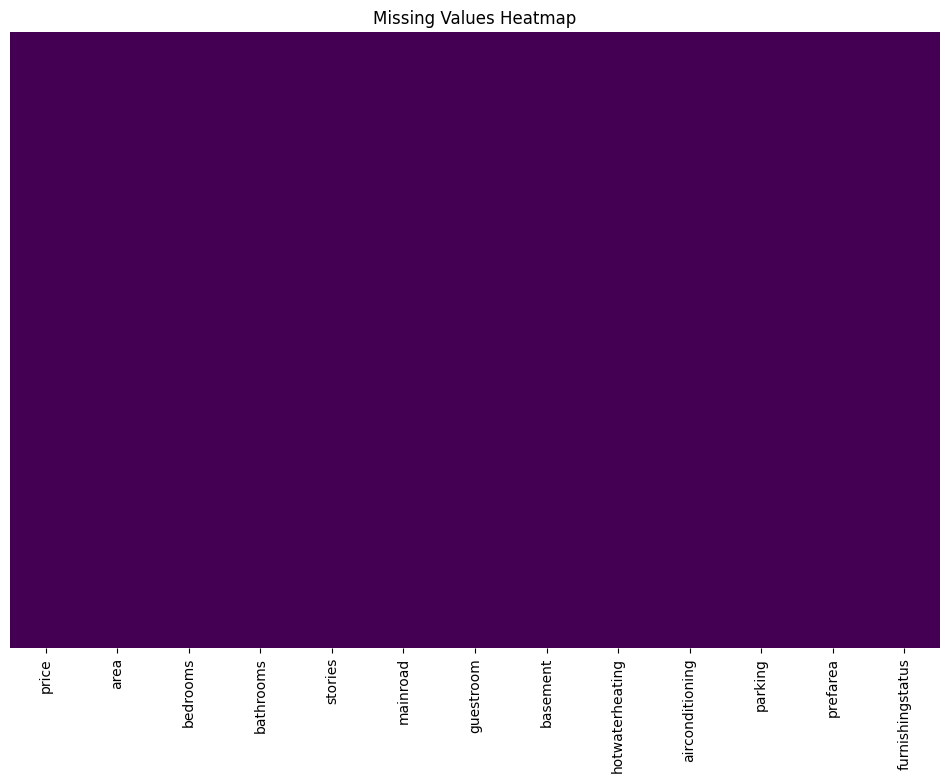

In [26]:
missing_values_analyser.visualize_missing_values(df)

1. **Dataset Dimensions**:
- Total Rows: 545 records
- Total Columns: 13 features

2. **Feature Types**:
- **Numerical Features** (6 columns):
  - price (target variable)
  - area
  - bedrooms (discrete)
  - bathrooms (discrete)
  - stories (discrete)
  - parking (discrete)

- **Categorical Features** (7 columns):
  - mainroad (yes/no)
  - guestroom (yes/no)
  - basement (yes/no)
  - hotwaterheating (yes/no)
  - airconditioning (yes/no)
  - prefarea (yes/no)
  - furnishingstatus (furnished/semi-furnished/unfurnished)

3. **Data Quality**:
- No missing values in any column (all 545 rows are complete)
- No duplicate entries

4. **Value Ranges** (for key numerical features):
- Price: 1.75M to 13.3M (target variable)
- Area: 1,650 to 16,200 square units
- Bedrooms: 1 to 6
- Bathrooms: 1 to 4
- Stories: 1 to 4
- Parking: 0 to 3

**Key Insights: (Numerical Columns):**
    Price:
        Most house prices range between 3.4M and 5.7M.
        The average price is 4.77M, with significant variation due to high-priced outliers (max: 13.3M).

    Area:
        Average house size is 5,150 sq. ft..
        Most houses fall between 3,600 and 6,360 sq. ft., but a few are extremely large (max: 16,200 sq. ft.).

    Bedrooms:
        Majority of houses have 2 to 3 bedrooms (mean: 3).

    Bathrooms:
        Most houses have 1 to 2 bathrooms (mean: 1.3).

    Stories:
        Houses typically have 1 to 2 stories (mean: 1.8).

    Parking:
        Most houses have 0 to 1 parking spaces (mean: 0.7, max: 3).

**Summary**: The data shows moderate house sizes (around 5,150 sq. ft.) with 2-3 bedrooms, 1-2 bathrooms, and 1-2 stories. Prices are mostly clustered below 5.7M, but high outliers influence the average. Parking availability is generally low.

**Key Insights: (Categorical Columns):**

    Mainroad:
        Majority of houses (468) have access to the main road.

    Guestroom:
        Most houses (448) do not have a guest room.

    Basement:
        Majority of houses (354) do not have a basement.

    Hot Water Heating:
        Very few houses have hot water heating (520 have no hot water heating).

    Air Conditioning:
        Most houses (373) do not have air conditioning.

    Preferred Area:
        Majority of houses (417) are not located in a preferred area.

    Furnishing Status:
        The most common furnishing status is semi-furnished (227 houses), followed by other categories.

**Summary**: Most houses lack additional features like guest rooms, basements, air conditioning, and hot water heating. Access to the main road is common, but preferred area locations are less frequent. Semi-furnished houses are the most prevalent furnishing type.

The dataset is clean and well-structured with:
- No missing values that need imputation
- A good mix of numerical and categorical features
- Binary categorical variables (mostly yes/no)
- One multi-class categorical variable (furnishingstatus)
- Reasonable value ranges with no obvious errors


## Univariate Analysis

### Descriptive Statistics for 'price' ###
count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

Missing values in 'price': 0

Number of outliers in 'price': 15



C:\Users\heeln\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\heeln\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\heeln\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categori

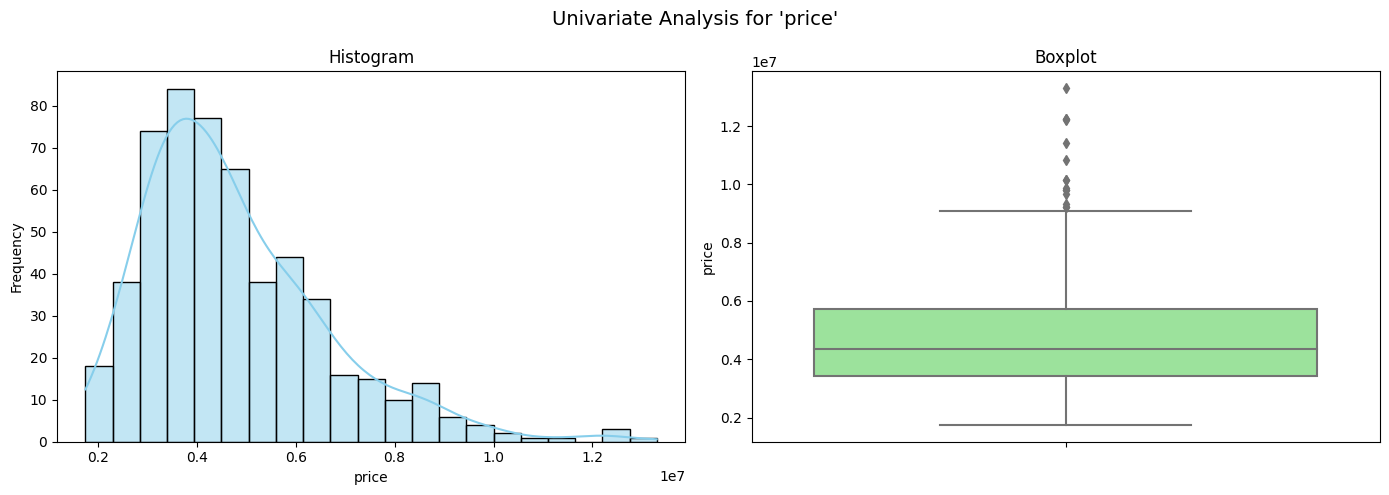

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

In [29]:
analyzer = NumericalUnivariateAnalysisStrategy()
analyzer.analyze(df, 'price')

Here are some insights based on the provided **univariate analysis for the 'price'** column:

1. **Distribution**:
   - The histogram shows that the **price distribution is right-skewed**.
   - Most house prices are concentrated towards the **lower price range** (below ~6,000,000), while fewer houses are priced at the higher end.

2. **Outliers**:
   - The boxplot highlights the presence of **several outliers** in the high price range (above ~8,000,000).
   - These outliers indicate houses with significantly higher prices than the majority.

3. **Central Tendency**:
   - From the boxplot, the **median price** lies approximately around **4,000,000**.
   - The interquartile range (IQR) shows that most house prices fall between **~3,000,000** and **~5,700,000**.

4. **Spread**:
   - The price data exhibits a **wide spread**, with prices ranging from approximately **1,750,000** to **13,300,000**.

### Key Takeaways (Prices):
- Most houses are priced in the lower range with only a few very expensive houses.
- There are significant **outliers** that could influence modeling or analysis.
- Further investigation could be conducted to understand what drives these high outliers (e.g., house size, location, or features).

### Value Counts for 'mainroad' ###
mainroad
yes    468
no      77
Name: count, dtype: int64

Missing values in 'mainroad': 0



C:\Users\heeln\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\heeln\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


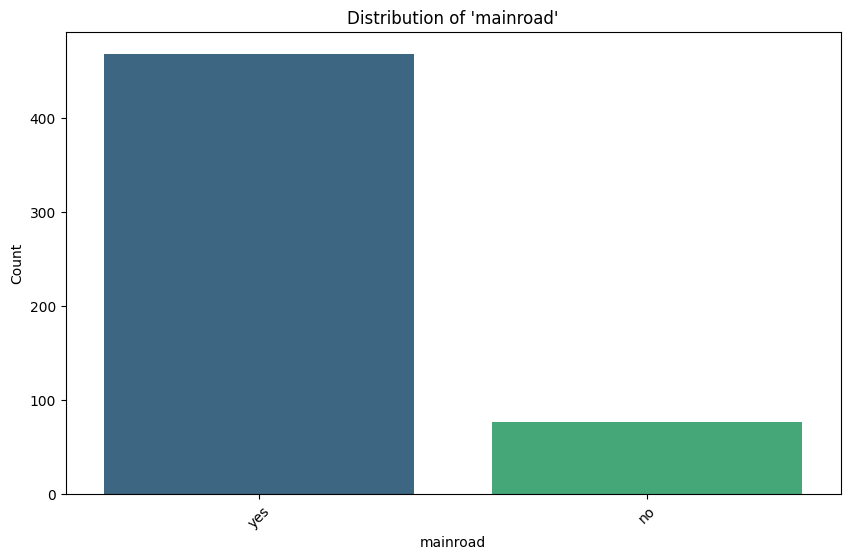

mainroad
yes    468
no      77
Name: count, dtype: int64

In [34]:
analyzer = CategoricalUnivariateAnalysisStrategy()
#for col in ['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea', 'furnishingstatus']:
#    analyzer.analyze(df, col)
analyzer.analyze(df, 'mainroad')

The **'mainroad'** feature is highly **imbalanced**, with most houses located on the main road (**'Yes'**). This suggests that proximity to a main road is a common trait in the dataset. The **'No'** category, representing houses not on a main road, is much less frequent.